<h1> Imports </h1>

In [40]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns   
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

<h1> Dataset Downloaded </h1>

In [41]:
import kagglehub
path = kagglehub.dataset_download("zusmani/pakistans-largest-ecommerce-dataset")

<h1> Pre-Processing </h1>

In [42]:
df = pd.read_csv(f"{path}/Pakistan Largest Ecommerce Dataset.csv")
df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [43]:
print(df.shape)
print(df.info)

(1048575, 26)
<bound method DataFrame.info of           item_id          status created_at  \
0        211131.0        complete   7/1/2016   
1        211133.0        canceled   7/1/2016   
2        211134.0        canceled   7/1/2016   
3        211135.0        complete   7/1/2016   
4        211136.0  order_refunded   7/1/2016   
...           ...             ...        ...   
1048570       NaN             NaN        NaN   
1048571       NaN             NaN        NaN   
1048572       NaN             NaN        NaN   
1048573       NaN             NaN        NaN   
1048574       NaN             NaN        NaN   

                                                       sku   price  \
0                                        kreations_YI 06-L  1950.0   
1        kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                       Ego_UP0017-999-MR0  2450.0   
3                                           kcc_krone deal   360.0   
4                          

In [44]:
print(df.columns)

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


<h3> Dropping Last 5 Empty Columns </h3>

In [45]:
df = df.iloc[:, :-5]
df = df.dropna(how = 'all')

<h3> Removing trails from column name </h3>

In [46]:
df.rename(columns={' MV ': 'MV'}, inplace=True)
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

<h3> Assigned appropriate data types to columns </h3>

In [47]:
df[['Customer ID', 'item_id']] = df[['Customer ID', 'item_id']].astype(str)
df[['qty_ordered', 'Year', 'Month']] = df[['qty_ordered', 'Year', 'Month']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  object 
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int32  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-null  o

<h3> Assigning Appropriate Names to Columns </h3>

In [48]:
df.columns = df.columns.str.lower() # converting all to lower case
df.rename(columns={'category_name_1':'category','working date':'working_date','bi status':'bi_status','customer since':'customer_since','customer id':'customer_id'},inplace= True)

In [49]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474.0


<h3> Correcting Date Format </h3>

In [50]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474.0


In [51]:
df.describe()

,price,qty_ordered,grand_total,discount_amount,year,month
count,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000
mean,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654
std,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000
25%,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000
50%,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000
75%,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000


<h3> Sorting values based on dates </h3>

In [52]:
df = df.sort_values('created_at')

<h3> Changed a few column values to a better format </h3>

In [53]:
df['payment_method'] = df['payment_method'].replace('cod', 'cash on delivery')
df['status'] = df['status'].replace('cod', 'cash on delivery')
df['item_id'] = df['item_id'].str.replace('.0', '', regex=False)
df['customer_id'] = df['customer_id'].str.replace('.0', '', regex=False)

In [54]:
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
584459,905138,canceled,2018-08-28,ENTNOB5A4633C950FAD,15399.0,1,29199.0,100562333,Entertainment,NaN,...,bankalfalah,8/28/2018,Gross,"15,399",2018,8,2018-8,8-2018,FY19,114151
584523,905208,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474


<h3> Checking for any more missing values </h3>

In [55]:
print(df.isnull().sum())

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category                    164
sales_commission_code    137178
discount_amount               0
payment_method                0
working_date                  0
bi_status                     0
mv                            0
year                          0
month                         0
customer_since               11
m-y                           0
fy                            0
customer_id                   0
dtype: int64


<h3> Handling remaining missing values </h3>

In [56]:
import warnings
warnings.filterwarnings("ignore")
df['status'].fillna('Unknown', inplace=True)
df['sku'].fillna('Unknown', inplace=True)
df['customer_since'].fillna('Unknown', inplace=True)
df['category'].fillna('Unknown', inplace=True)
df.drop(columns=['sales_commission_code'], inplace=True)
df.drop(columns=['mv'], inplace=True)


<h3> Handling repititive values in Cols = {Status, Payment_Method, Category_Name} </h3>

**Checking For Repititive Values**

In [57]:
print(df['status'].value_counts())
print(df['payment_method'].value_counts())
print(df['category'].value_counts())

status
complete            233685
canceled            201249
received             77290
order_refunded       59529
refund                8050
cash on delivery      2859
paid                  1159
closed                 494
payment_review          57
pending                 48
processing              33
holded                  31
Unknown                 15
fraud                   10
pending_paypal           7
\N                       4
exchange                 4
Name: count, dtype: int64
payment_method
cash on delivery     271960
Payaxis               97641
Easypay               82900
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14028
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement

**Removing Repititions**

In [58]:
df['status'].replace({
    'cod':              'payment_pending',                  #order was paid 
    'cash on delivery': 'payment_pending',
    'paid':             'complete',
    'received':         'complete',            #customer has received the order
    'closed':           'complete',
    'order_refunded':   'canceled',       #order canceled
    'refund':           'canceled',
    'holded':           'on_hold',                #order on hold due to fraud/unknown address/pending online payments
    'Unknown':          'on_hold',
    '\\N':              'on_hold',
    'fraud':            'on_hold',
    'pending_paypal':   'payment_pending',
    'pending':          'payment_pending',
    'payment_review':   'payment_pending'
}, inplace=True)

df['category'].replace({
  '\\N' :       'Others',
  'Unknown':   'Others',
  'Soghaat': 'Gifts'
},inplace = True)

df.loc[df['discount_amount'] > df['price'], 'discount_amount'] = df['price']
df['grand_total'] = df[['price','qty_ordered','discount_amount']].apply(lambda x: (x['price'] * x['qty_ordered']) - x['discount_amount'],axis=1)

df['payment_method'].replace({
     'cash on delivery':        'cash_on_delivery',
    'cashatdoorstep':           'cash_on_delivery',
    'easypay':                  'easypay',
    'easypay_voucher':          'easypay',
    'easypay_ma':               'easypay',
    'Easypay':                  'easypay',
    'Easypay_MA':               'easypay',
    'jazzwallet':               'jazzcash',
    'jazzvoucher':              'jazzcash',
    'bankalfalah':              'bank_payment',
    'ublcreditcard':            'bank_payment',
    'mcblite':                  'bank_payment',
    'internetbanking':          'bank_payment',
    'payaxis':                  'payment_gateway',
    'Payaxis':                  'payment_gateway',
    'apg':                      'payment_gateway',
    'mygateway':                'payment_gateway',
    'customercredit':           'credit',
    'productcredit':            'credit',
    'financesettlement':        'credit',
    'marketingexpense':         'credit'   
},inplace = True)

print(df['status'].unique())
print(df['category'].unique())
print(df['payment_method'].unique())


['complete' 'canceled' 'on_hold' 'exchange' 'payment_pending' 'processing']
["Women's Fashion" 'Beauty & Grooming' 'Kids & Baby' 'Others' 'Gifts'
 'Home & Living' "Men's Fashion" 'Mobiles & Tablets' 'Superstore'
 'Appliances' 'Health & Sports' 'Computing' 'Entertainment' 'Books'
 'School & Education']
['cash_on_delivery' 'credit' 'bank_payment' 'payment_gateway' 'jazzcash'
 'easypay']


In [59]:
df.head(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,discount_amount,payment_method,working_date,bi_status,year,month,customer_since,m-y,fy,customer_id
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,0.0,cash_on_delivery,7/1/2016,#REF!,2016,7,2016-7,7-2016,FY17,1
375,211540,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147746,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43
374,211537,canceled,2016-07-01,Teenz_R-0172-7,2250.0,1,2250.0,100147744,Women's Fashion,0.0,cash_on_delivery,7/1/2016,Gross,2016,7,2016-7,7-2016,FY17,119
373,211536,canceled,2016-07-01,shoppingmania_18k Gold Filled Blue Ruby Neckla...,1499.0,1,1499.0,100147744,Women's Fashion,0.0,cash_on_delivery,7/1/2016,Gross,2016,7,2016-7,7-2016,FY17,119
372,211535,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147743,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43
371,211534,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147742,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43
370,211533,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147741,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43
369,211531,canceled,2016-07-01,LC_3595471021182,8150.0,1,8150.0,100147739,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Valid,2016,7,2016-7,7-2016,FY17,117
368,211532,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147740,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43
367,211530,complete,2016-07-01,kcc_krone deal,360.0,1,360.0,100147738,Beauty & Grooming,0.0,cash_on_delivery,7/1/2016,Net,2016,7,2016-7,7-2016,FY17,43


<h2> Univariate Analysis </h2>

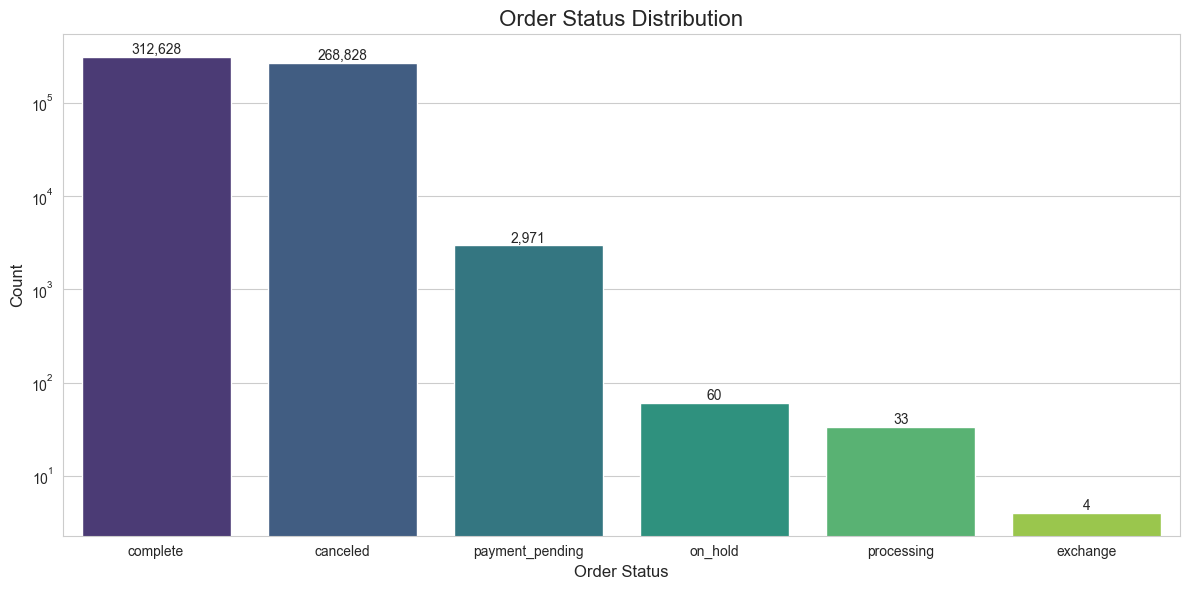

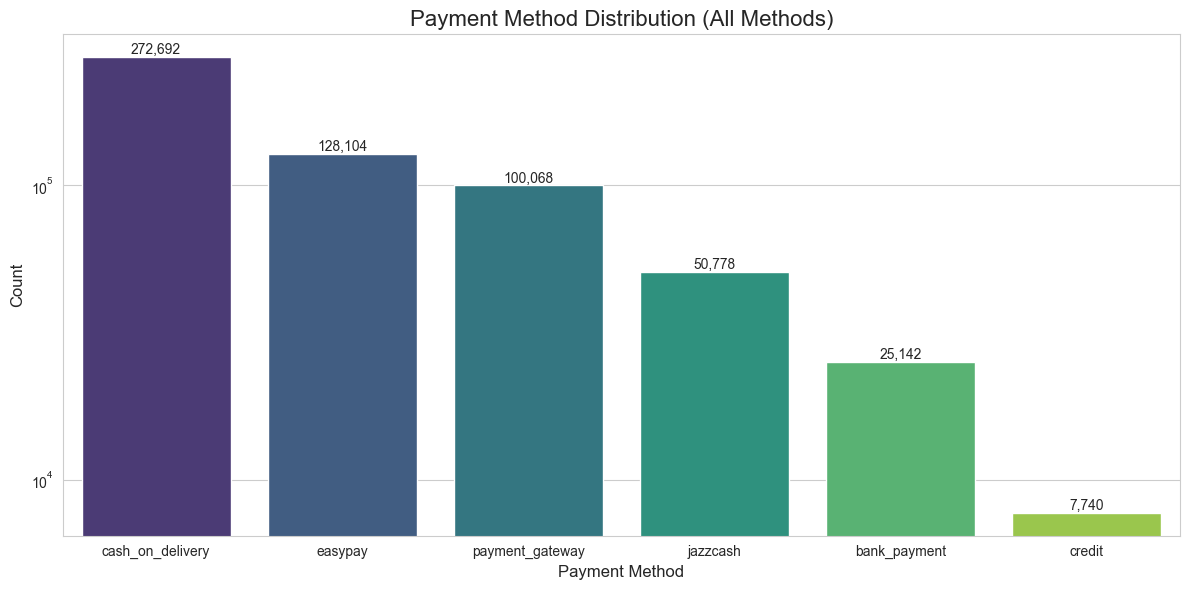

In [60]:
import warnings

# Ignore warnings for clean output
warnings.filterwarnings("ignore")

# Set seaborn style
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

# ---------------------- Plot 1: Order Status Distribution ----------------------

status_order = df['status'].value_counts().index.tolist()
df_filtered_status = df  # No filtering

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered_status, x='status', order=status_order, palette=palette)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), ha="center", rotation=0)
plt.title('Order Status Distribution', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',                # Format with comma separator
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------------- Plot 2: Payment Method Distribution ----------------------

payment_counts = df['payment_method'].value_counts()
top_payment_methods = payment_counts.index.tolist()
df_filtered_payment = df  # No filtering

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered_payment, x='payment_method', order=top_payment_methods, palette=palette)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), ha="center", rotation=0)
plt.title(f'Payment Method Distribution (All Methods)', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [61]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['working_date'] = pd.to_datetime(df['working_date'], errors='coerce')


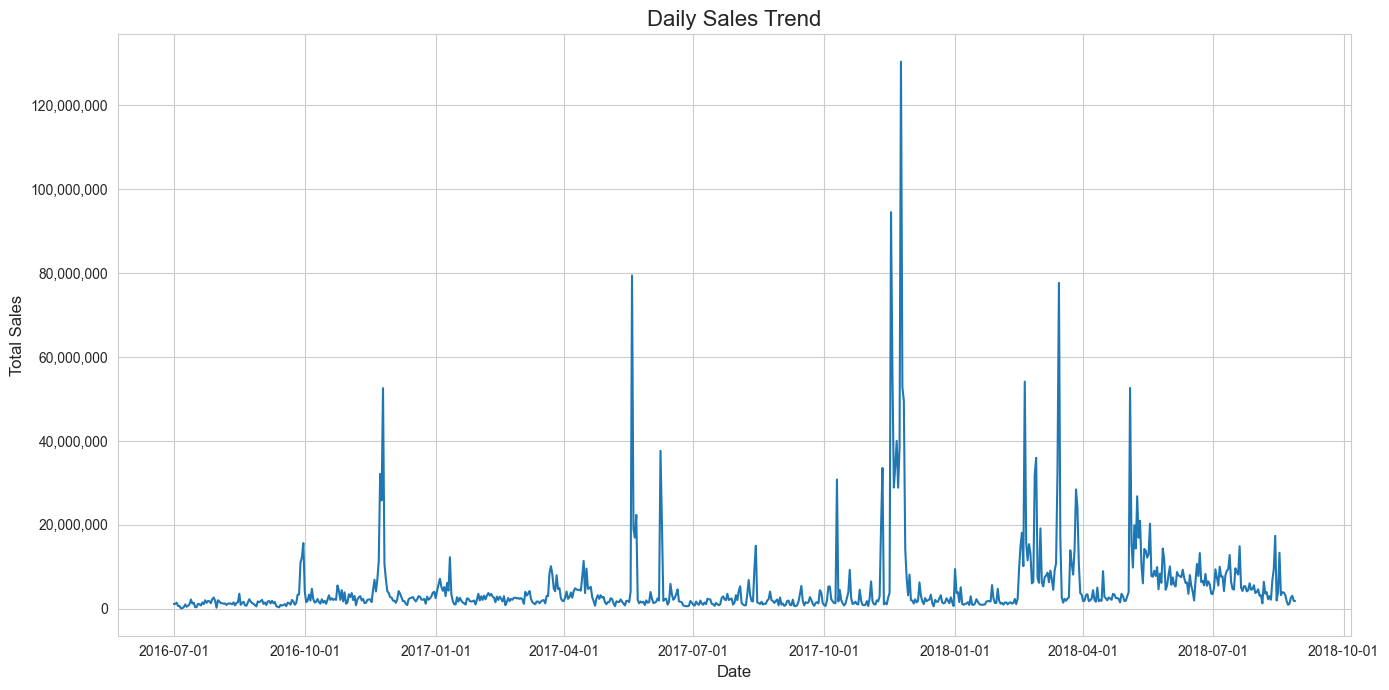

In [62]:
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
df['created_at'] = pd.to_datetime(df['created_at'])
daily_sales = df.groupby(df['created_at'].dt.date)['grand_total'].sum().reset_index()
daily_sales.rename(columns={'created_at': 'Date', 'grand_total': 'Total Sales'}, inplace=True)
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=daily_sales, x='Date', y='Total Sales', palette=palette)
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)


ax.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0, ha='center') 
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

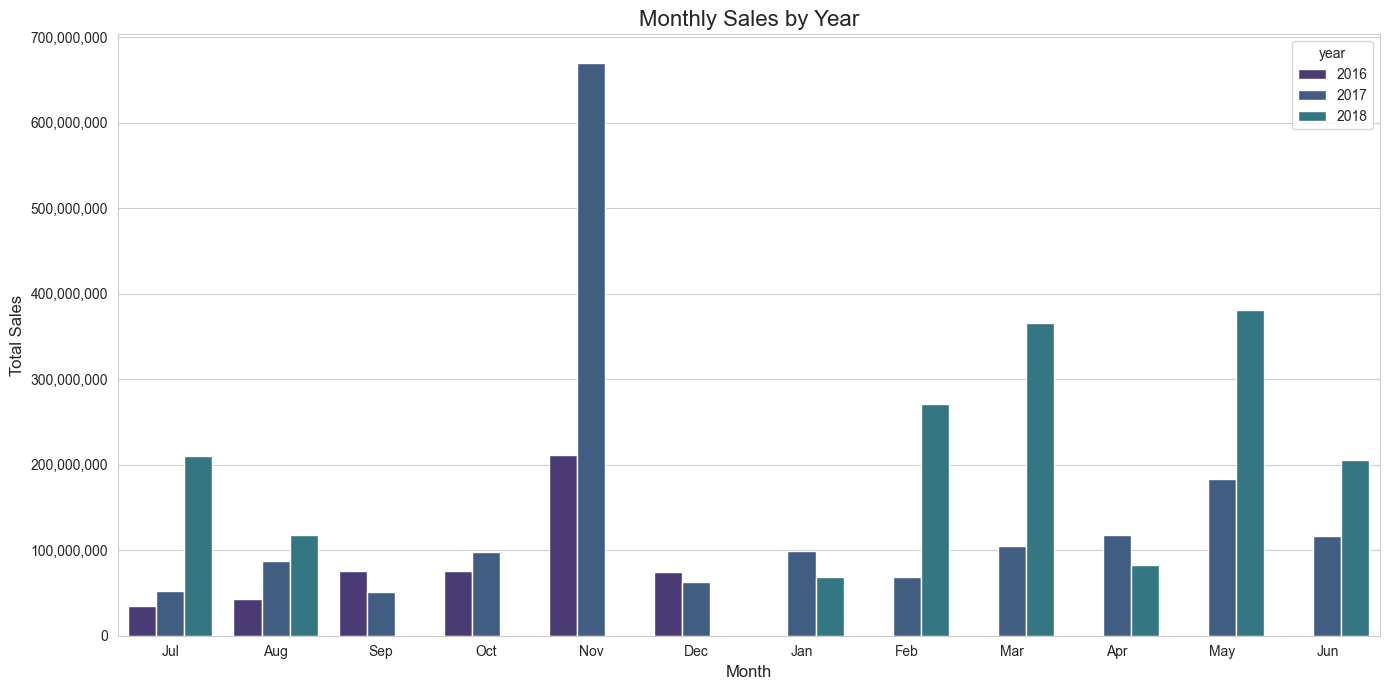

In [63]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
monthly_sales = df.groupby(['year', 'month'])['grand_total'].sum().reset_index()
monthly_sales['month_abbr'] = monthly_sales['month'].apply(lambda x: pd.Timestamp(f'2023-{x}-01').strftime('%b'))
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=monthly_sales, x='month_abbr', y='grand_total', hue='year', palette=palette)
plt.title('Monthly Sales by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), ha="center") 

plt.tight_layout()
plt.show()

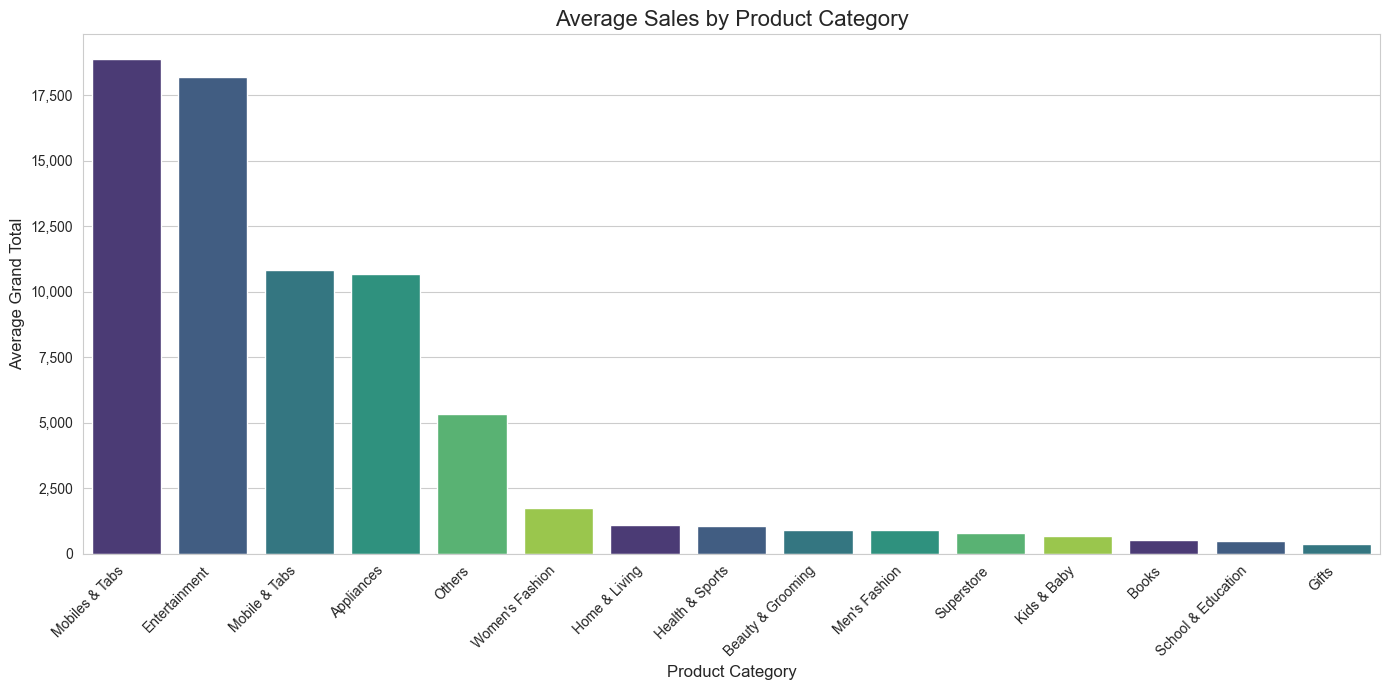

In [64]:
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

# Step 1: Compute average sales per category
category_sales = df.groupby('category')['grand_total'].mean().reset_index()

# Step 2: Define name mapping (abbreviated labels)
category_name_mapping = {
    'Mobiles & Tablets': 'Mobiles & Tabs',
    'Computing': 'Mobile & Tabs',
    'Men\'s Fashion': 'Men\'s Fashion',
    'Women\'s Fashion': 'Women\'s Fashion',
    'Appliances': 'Appliances',
    'Home & Living': 'Home & Living',
    'Entertainment': 'Entertainment',
    'Superstore': 'Superstore',
    'Books': 'Books',
    'School & Education': 'School & Education',
    'Kids & Baby': 'Kids & Baby',
    'Others': 'Others',
    'Groceries': 'Groceries',
    'Gifts': 'Gifts',
    'Health & Sports': 'Health & Sports',
    'Beauty & Grooming': 'Beauty & Grooming'
}

category_sales['category_abbr'] = category_sales['category'].map(category_name_mapping)

# Step 4: Sort by grand_total in descending order
category_sales = category_sales.sort_values(by='grand_total', ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=category_sales, x='category_abbr', y='grand_total', palette=palette)
plt.title('Average Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Grand Total', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()
plt.show()


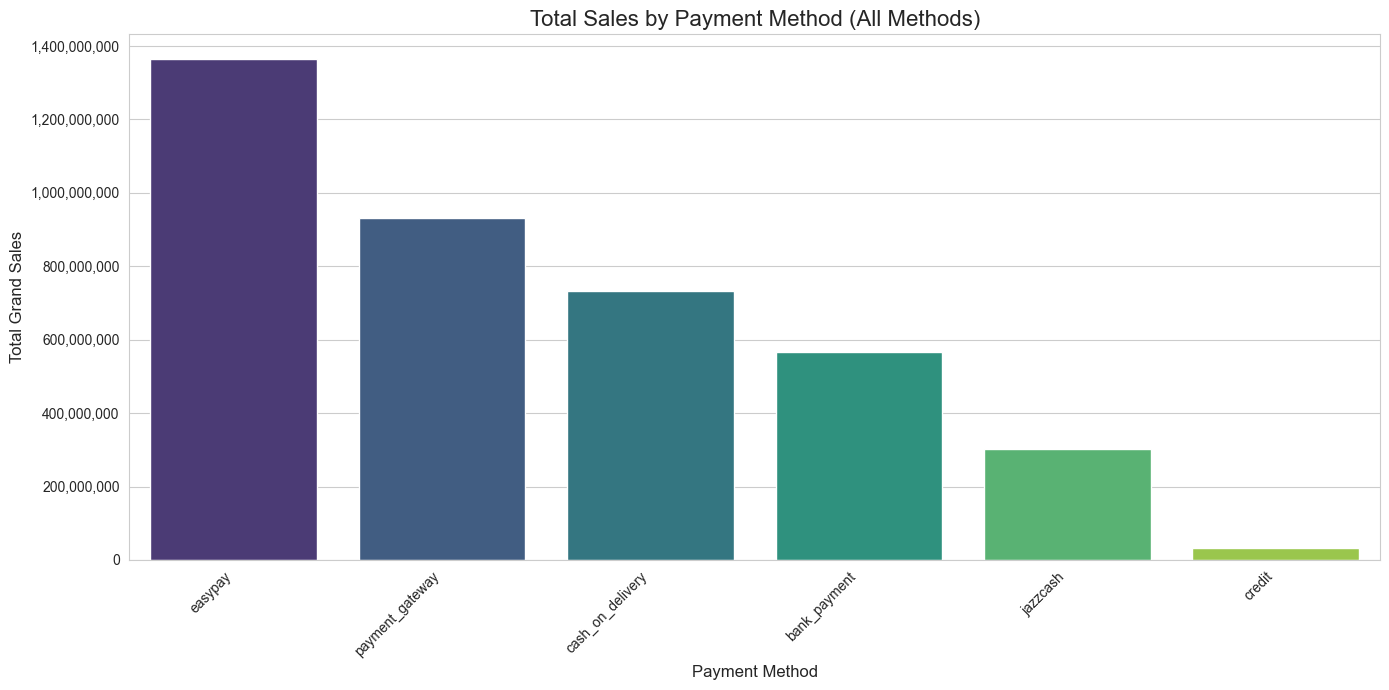

In [65]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

# Step 1: Group total sales by payment method
payment_sales = df.groupby('payment_method')['grand_total'].sum().reset_index()

# Step 2: Sort by sales for better visual order (optional but recommended)
payment_sales = payment_sales.sort_values(by='grand_total', ascending=False)

# Step 3: Plot all payment methods
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=payment_sales, x='payment_method', y='grand_total', palette=palette)

# Labels & formatting
plt.title('Total Sales by Payment Method (All Methods)', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Grand Sales', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate if needed
plt.tight_layout()
plt.show()


<h2> Visualizing Quantity of Products Ordered on Average by a User </h2>

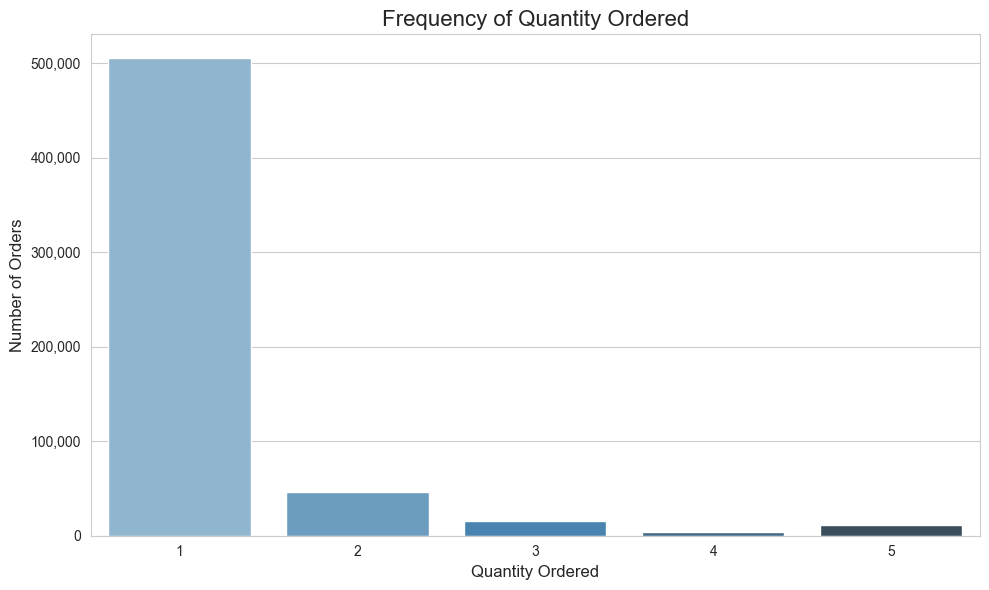

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count occurrences of each quantity ordered
quantity_counts = df['qty_ordered'].value_counts().sort_index()

# Ensure 1 is the most prominent by removing 0 if it's misleading
if 0 in quantity_counts.index:
    quantity_counts = quantity_counts[quantity_counts.index > 0]  

# Restrict to a reasonable range (e.g., 1-5 for clarity)
quantity_counts = quantity_counts[quantity_counts.index <= 5]

# Set a visually appealing style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Choose a more distinct, readable palette
palette = sns.color_palette("Blues_d", n_colors=len(quantity_counts))

# Convert x-axis values to strings for categorical display
ax = sns.barplot(x=quantity_counts.index.astype(str), 
                 y=quantity_counts.values, 
                 palette=palette)

# Title and labels
plt.title('Frequency of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Format y-axis for better readability (e.g., 100,000 instead of 100000)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


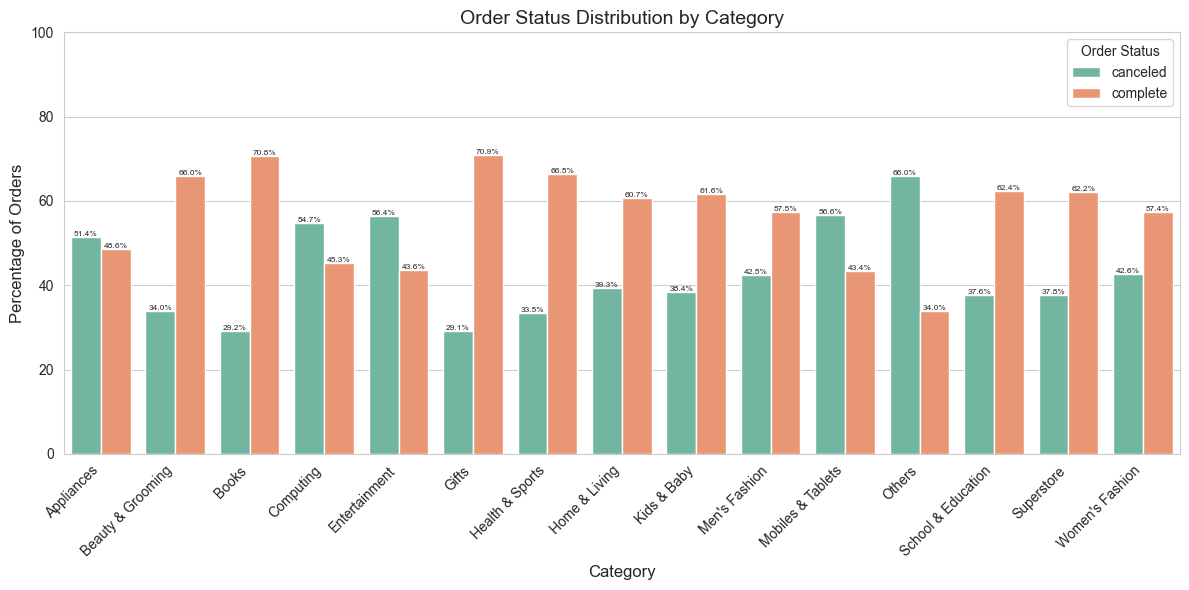

In [67]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Define statuses to keep
relevant_statuses = ['complete', 'canceled']

# Filter dataset
df_filtered = df[df['status'].isin(relevant_statuses)].copy()

# Compute percentage of each status per category
status_counts = df_filtered.groupby(['category', 'status']).size().reset_index(name='count')
total_counts = df_filtered.groupby(['category']).size().reset_index(name='total')

# Merge to calculate percentage
status_distribution = status_counts.merge(total_counts, on='category')
status_distribution['percentage'] = (status_distribution['count'] / status_distribution['total']) * 100

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=status_distribution, x='category', y='percentage', hue='status', palette=palette)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating bars with zero height
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=6)

# Labels and title
plt.title('Order Status Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage of Orders', fontsize=12)
plt.ylim(0, 100)  # Set percentage range
plt.legend(title='Order Status')

plt.tight_layout()
plt.show()

<h3> Best Categories Based on Quantity and Total Sales </h3>

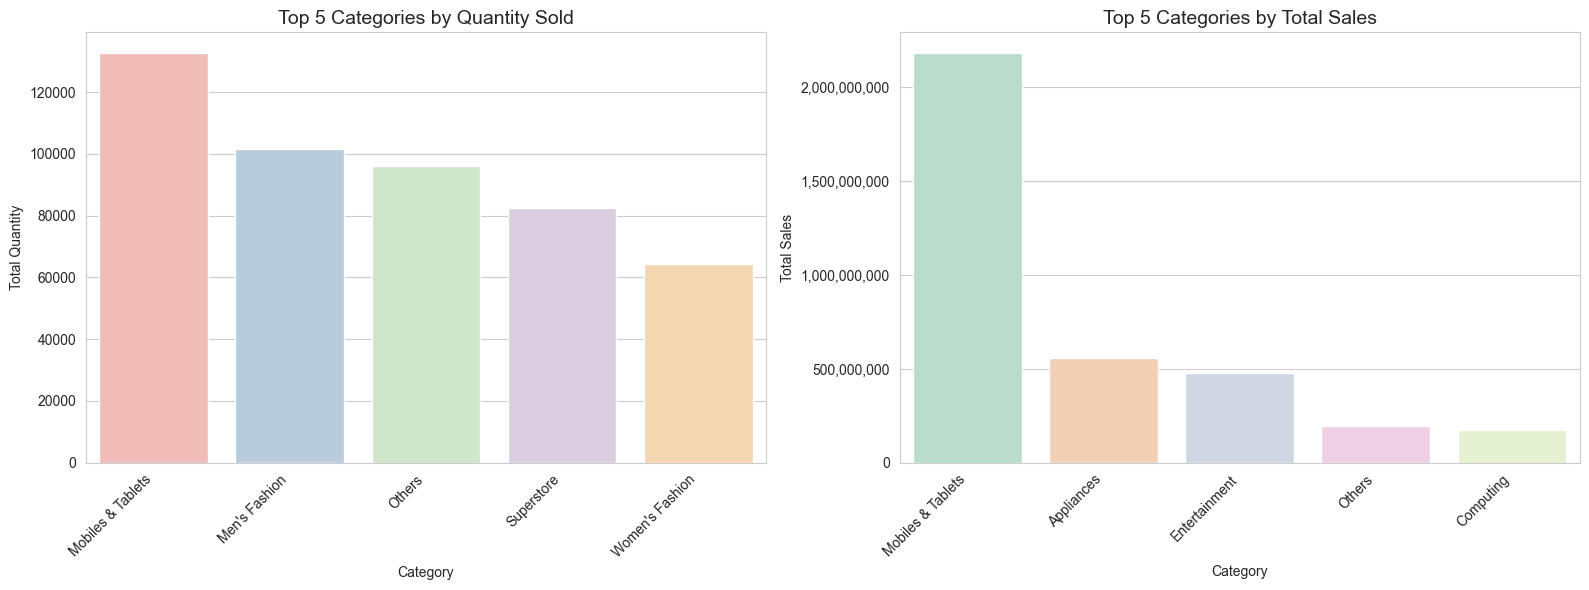

In [68]:
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# ---------- 1. Top 5 by Quantity Sold ----------
top_qty = (
    df.groupby('category')['qty_ordered'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# ---------- 2. Top 5 by Total Sales (grand_total) ----------
top_sales = (
    df.groupby('category')['grand_total'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# ---------- Plotting ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Quantity Plot
sns.barplot(data=top_qty, x='category', y='qty_ordered', palette='Pastel1', ax=axes[0])
axes[0].set_title('Top 5 Categories by Quantity Sold', fontsize=14)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Quantity')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Sales Plot
sns.barplot(data=top_sales, x='category', y='grand_total', palette='Pastel2', ax=axes[1])
axes[1].set_title('Top 5 Categories by Total Sales', fontsize=14)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Sales')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.tight_layout()
plt.show()


<h3>Discount Per Category Analysis </h3>

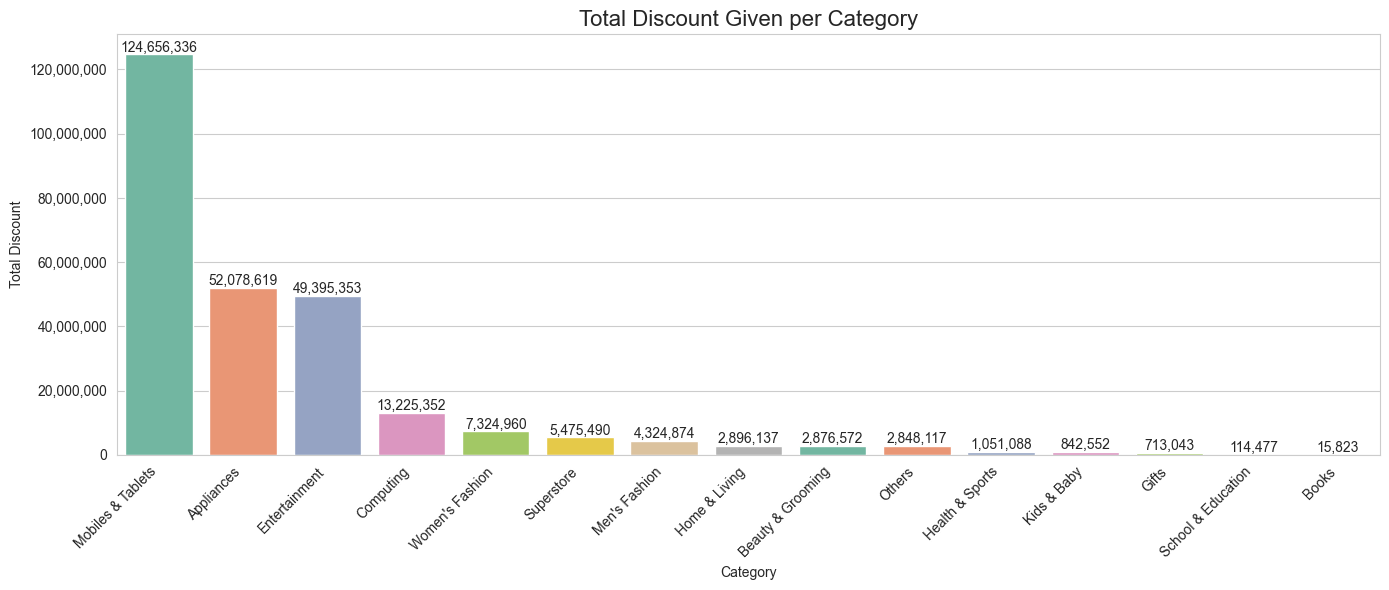

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Total discount sum per category
total_discount = (
    df.groupby('category')['discount_amount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=total_discount, x='category', y='discount_amount', palette=palette)
plt.title('Total Discount Given per Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Total Discount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


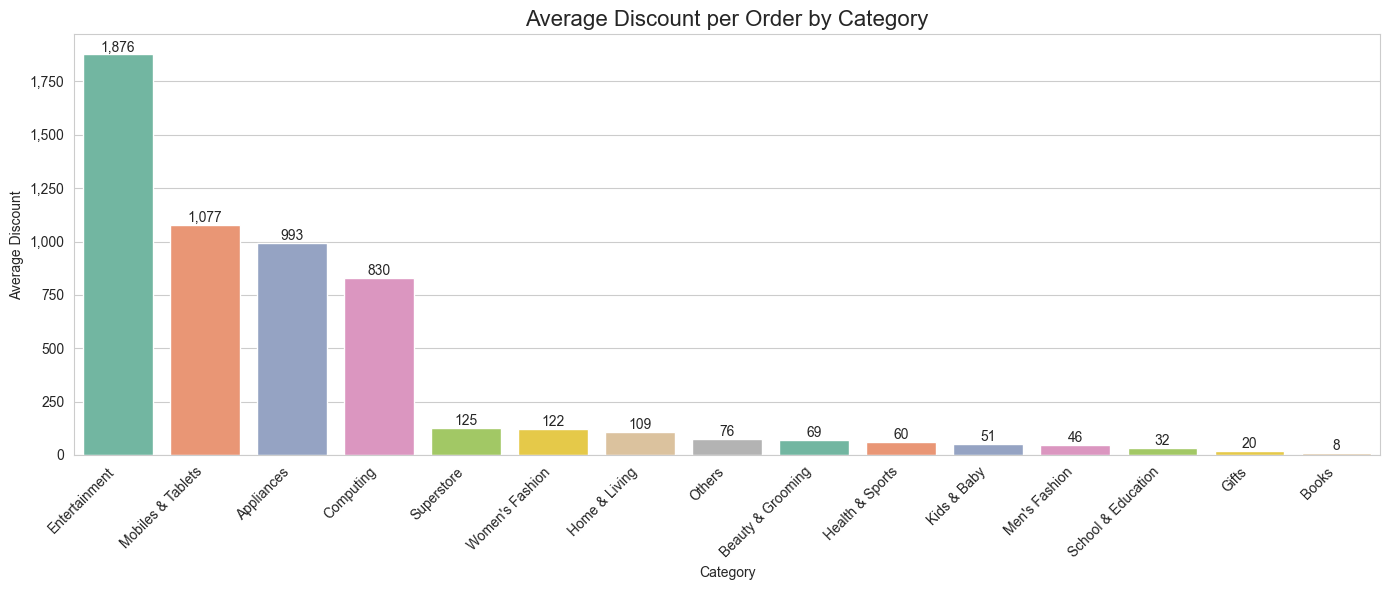

In [70]:
# Average discount amount per order
avg_discount = (
    df.groupby('category')['discount_amount']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=avg_discount, x='category', y='discount_amount', palette=palette)
plt.title('Average Discount per Order by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Average Discount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


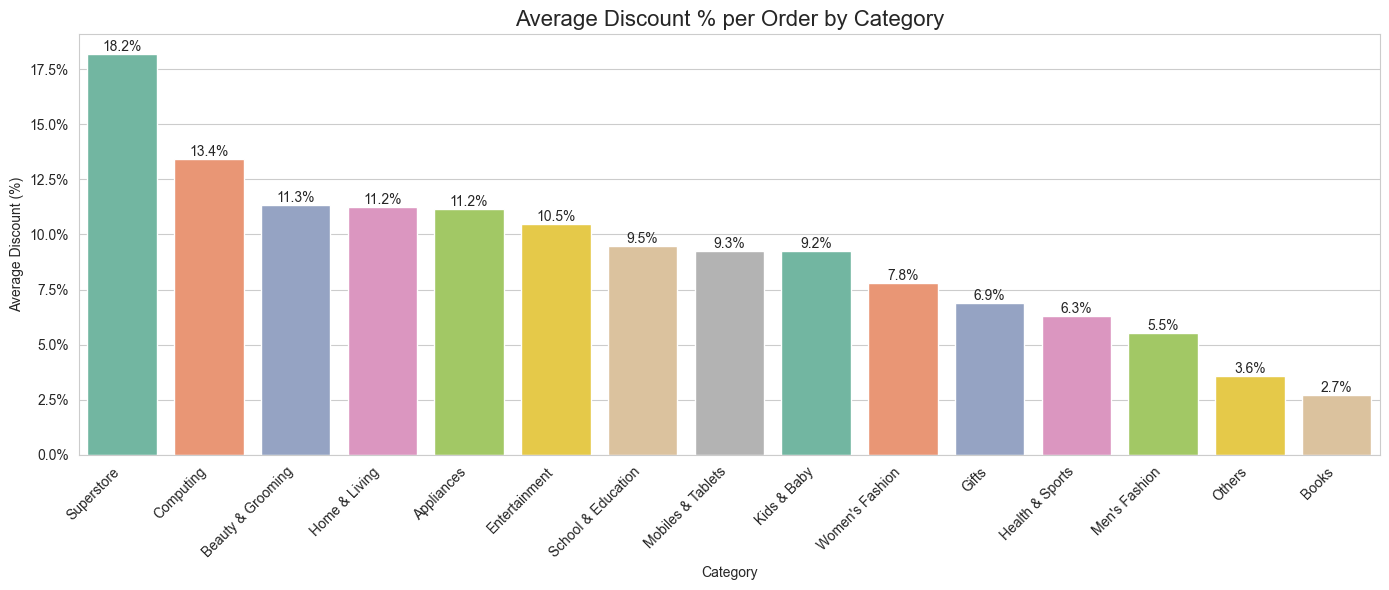

In [71]:
# Calculate discount % per row
df['discount_pct'] = df['discount_amount'] / (df['price'] * df['qty_ordered'])

# Clean: remove infinities or NaNs
df = df[df['discount_pct'].notnull() & df['discount_pct'].apply(lambda x: x != float('inf'))]

# Group by category and average the discount %
avg_discount_pct = (
    df.groupby('category')['discount_pct']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Convert to percentage
avg_discount_pct['discount_pct'] *= 100

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=avg_discount_pct, x='category', y='discount_pct', palette=palette)
plt.title('Average Discount % per Order by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Average Discount (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<h3>Volume Trends by Quarter per Year</h3>

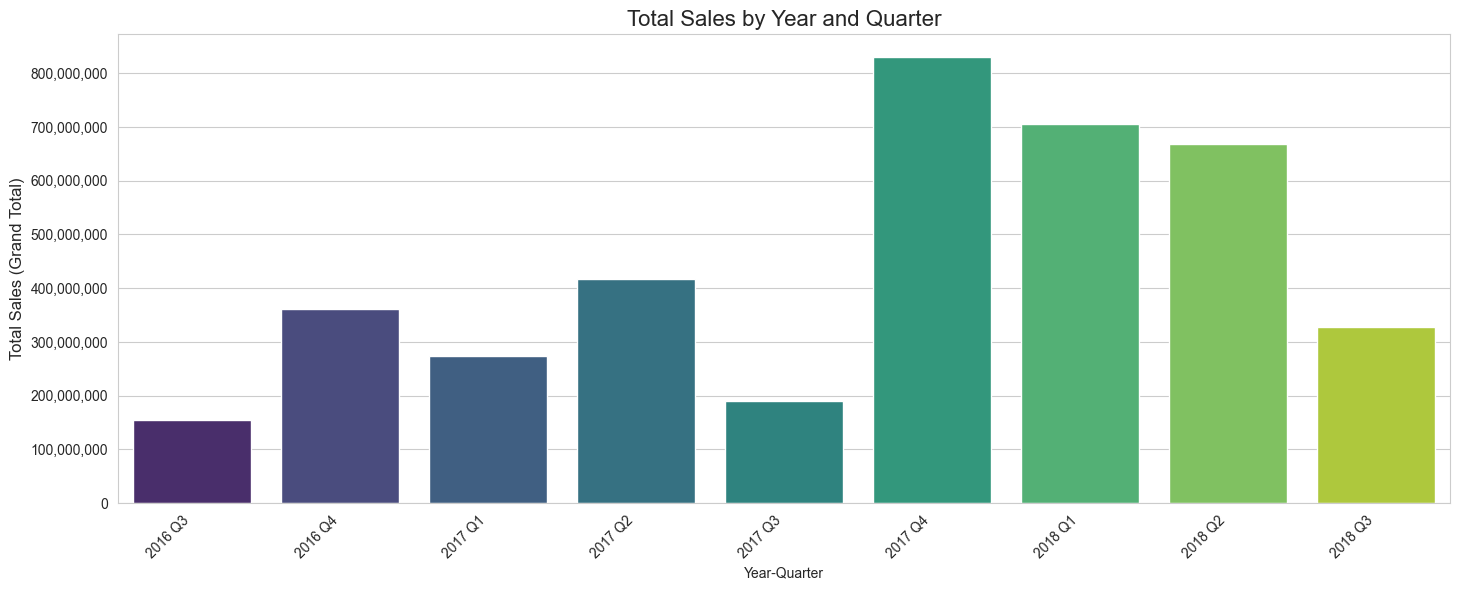

In [72]:
sns.set_style("whitegrid")

# Step 1: Convert to datetime if not already
df['working_date'] = pd.to_datetime(df['working_date'])

# Step 2: Extract year and quarter
df['year'] = df['working_date'].dt.year
df['quarter'] = df['working_date'].dt.quarter

# Step 3: Group by year and quarter, sum grand_total
volume_trends = (
    df.groupby(['year', 'quarter'])['grand_total']
    .sum()
    .reset_index()
)

# Step 4: Create combined period column for plotting
volume_trends['period'] = volume_trends['year'].astype(str) + ' Q' + volume_trends['quarter'].astype(str)

# Step 5: Plot total sales
plt.figure(figsize=(14, 6))
sns.barplot(data=volume_trends, x='period', y='grand_total', palette='viridis')
plt.title('Total Sales by Year and Quarter', fontsize=16)
plt.xlabel('Year-Quarter')
plt.ylabel('Total Sales (Grand Total)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax = plt.gca()
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


<h3>Top 3 Categories Every Year for Each Category</h3>

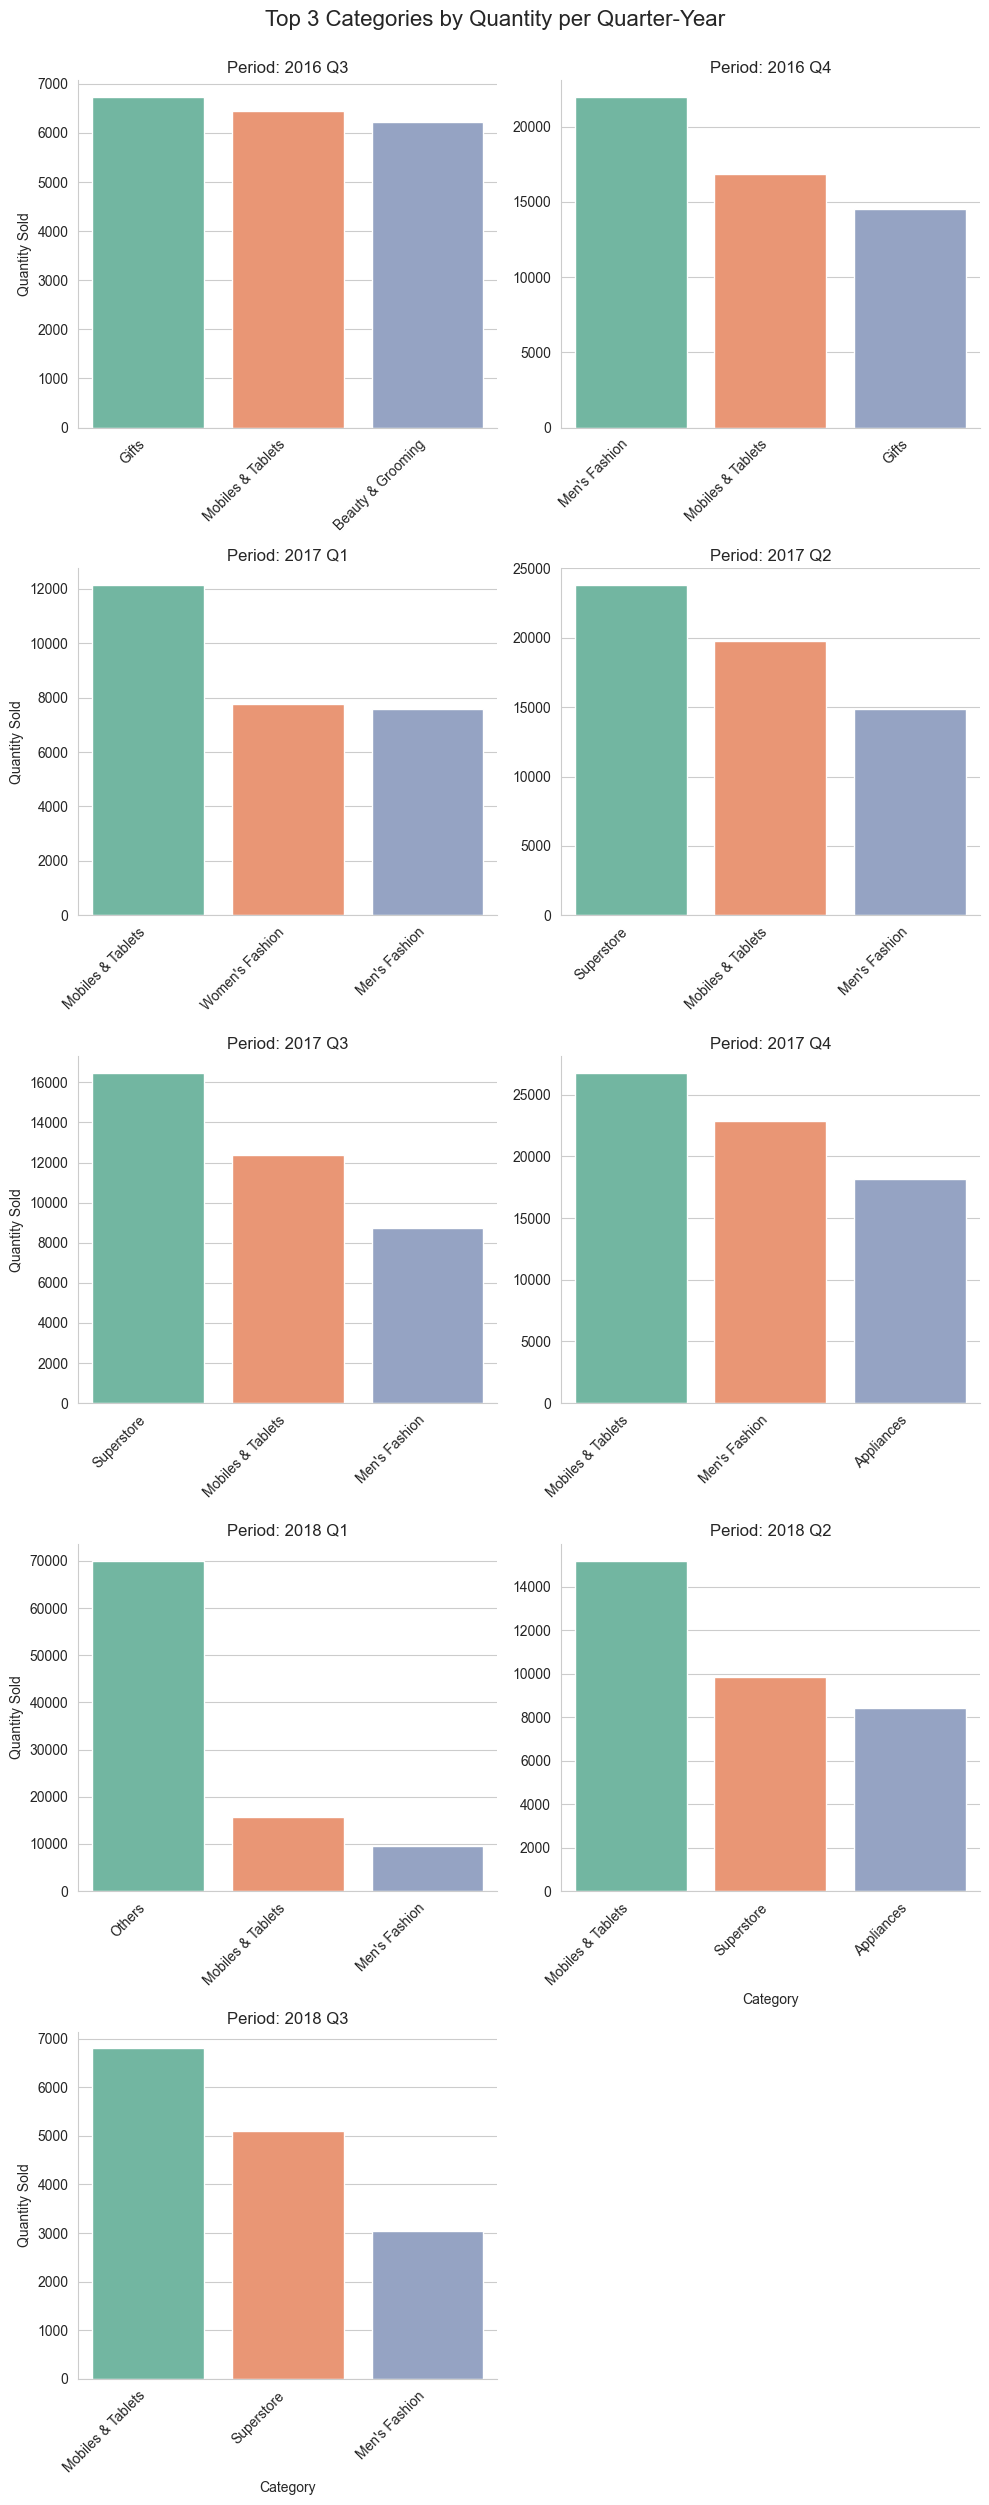

In [73]:

sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Make sure date is datetime
df['working_date'] = pd.to_datetime(df['working_date'])
df['year'] = df['working_date'].dt.year
df['quarter'] = df['working_date'].dt.quarter

# Group and aggregate quantity per category per year-quarter
category_trends = (
    df.groupby(['year', 'quarter', 'category'])['qty_ordered']
    .sum()
    .reset_index()
)

# Get top 3 categories per year-quarter
top_categories = (
    category_trends.sort_values(['year', 'quarter', 'qty_ordered'], ascending=[True, True, False])
    .groupby(['year', 'quarter'])
    .head(3)
)

# Create combined period column for clarity
top_categories['period'] = top_categories['year'].astype(str) + ' Q' + top_categories['quarter'].astype(str)

# Sort categories in descending order of qty within each period
top_categories = top_categories.sort_values(['period', 'qty_ordered'], ascending=[True, False])

# Create a custom order list for categories for consistent ordering in each plot
def get_sorted_categories(group):
    return group.sort_values('qty_ordered', ascending=False)['category'].tolist()

category_order_per_period = (
    top_categories.groupby('period')
    .apply(get_sorted_categories)
    .to_dict()
)

# Plot each quarter-year as a separate subplot
g = sns.FacetGrid(
    top_categories, 
    col='period', 
    col_wrap=2, 
    height=5, 
    aspect=1, 
    sharex=False, 
    sharey=False
)

# Custom plot logic to respect ordering
def barplot_with_sorted_order(data, **kwargs):
    period = data['period'].iloc[0]
    order = category_order_per_period[period]
    sns.barplot(data=data, x='category', y='qty_ordered', order=order, palette=palette)

g.map_dataframe(barplot_with_sorted_order)

# Set titles and axis labels
g.set_titles("Period: {col_name}",size=12)
g.set_axis_labels("Category", "Quantity Sold")

# Rotate labels for clarity
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(top=0.85)  # Adjust the top margin to avoid overlapping
# Set main figure title again
g.fig.suptitle("Top 3 Categories by Quantity per Quarter-Year", fontsize=16, y=1)
plt.tight_layout()
plt.show()


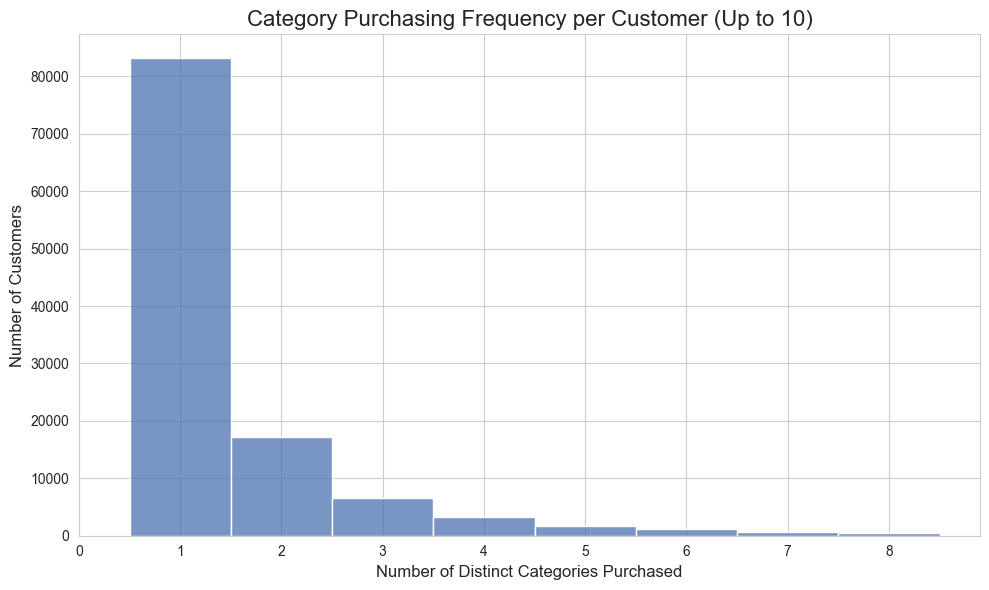

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -- Data preparation (assuming you have the DataFrame below) --
customer_category_counts = df.groupby('customer_id')['category'].nunique().reset_index()
customer_category_counts.rename(columns={'category': 'Category Count'}, inplace=True)

# Filter to only include up to 10 categories (you can decide whether to group 10+ into a single bin)
filtered_counts = customer_category_counts[customer_category_counts['Category Count'] <= 8]

# Use a nicer style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Create histogram with a discrete axis from 0 to 10 (inclusive)
bins = np.arange(0, 10)  # 0 to 11 as bin edges, so it captures counts up to 10
sns.histplot(
    data=filtered_counts, 
    x='Category Count', 
    bins=bins, 
    discrete=True,
    color='#4C72B0',       # Example color from a pleasing palette
    edgecolor='white'      # White edges make bars visually distinct
)

plt.title('Category Purchasing Frequency per Customer (Up to 10)', fontsize=16)
plt.xlabel('Number of Distinct Categories Purchased', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(range(0, 9))  # Label x-axis from 0 to 10
plt.tight_layout()
plt.show()


## Is there a correlation between payment method and order status? ##

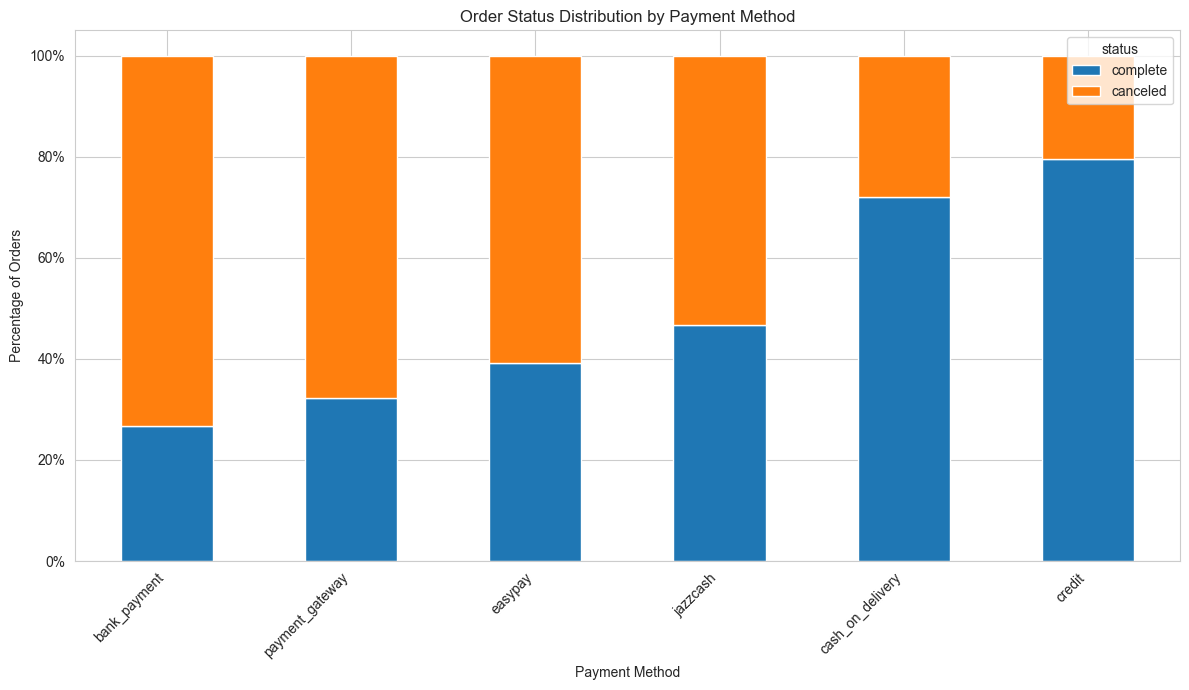

In [ ]:
PAYMENT, STATUS = 'payment_method', 'status'
TARGET = ['complete', 'canceled']
MIN_ORDERS = 20

assert {PAYMENT, STATUS}.issubset(df.columns), "Missing required columns"

# Filter down to only complete/canceled & enough-represented methods
df = (
    df
    .dropna(subset=[PAYMENT, STATUS])
    .query("status in @TARGET")
)
counts = df[PAYMENT].value_counts()
valid = counts[counts >= MIN_ORDERS].index
df = df[df[PAYMENT].isin(valid)]

# Build % table
ct = pd.crosstab(df[PAYMENT], df[STATUS])
prop = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Plot
prop[['complete','canceled']]\
    .sort_values('canceled', ascending=False)\
    .plot(kind='bar', stacked=True, figsize=(12,7))
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Payment Method')
ax.set_ylabel('Percentage of Orders')
ax.set_title('Order Status Distribution by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## What are the best-selling product categories, and how do sales trends vary over time? ##

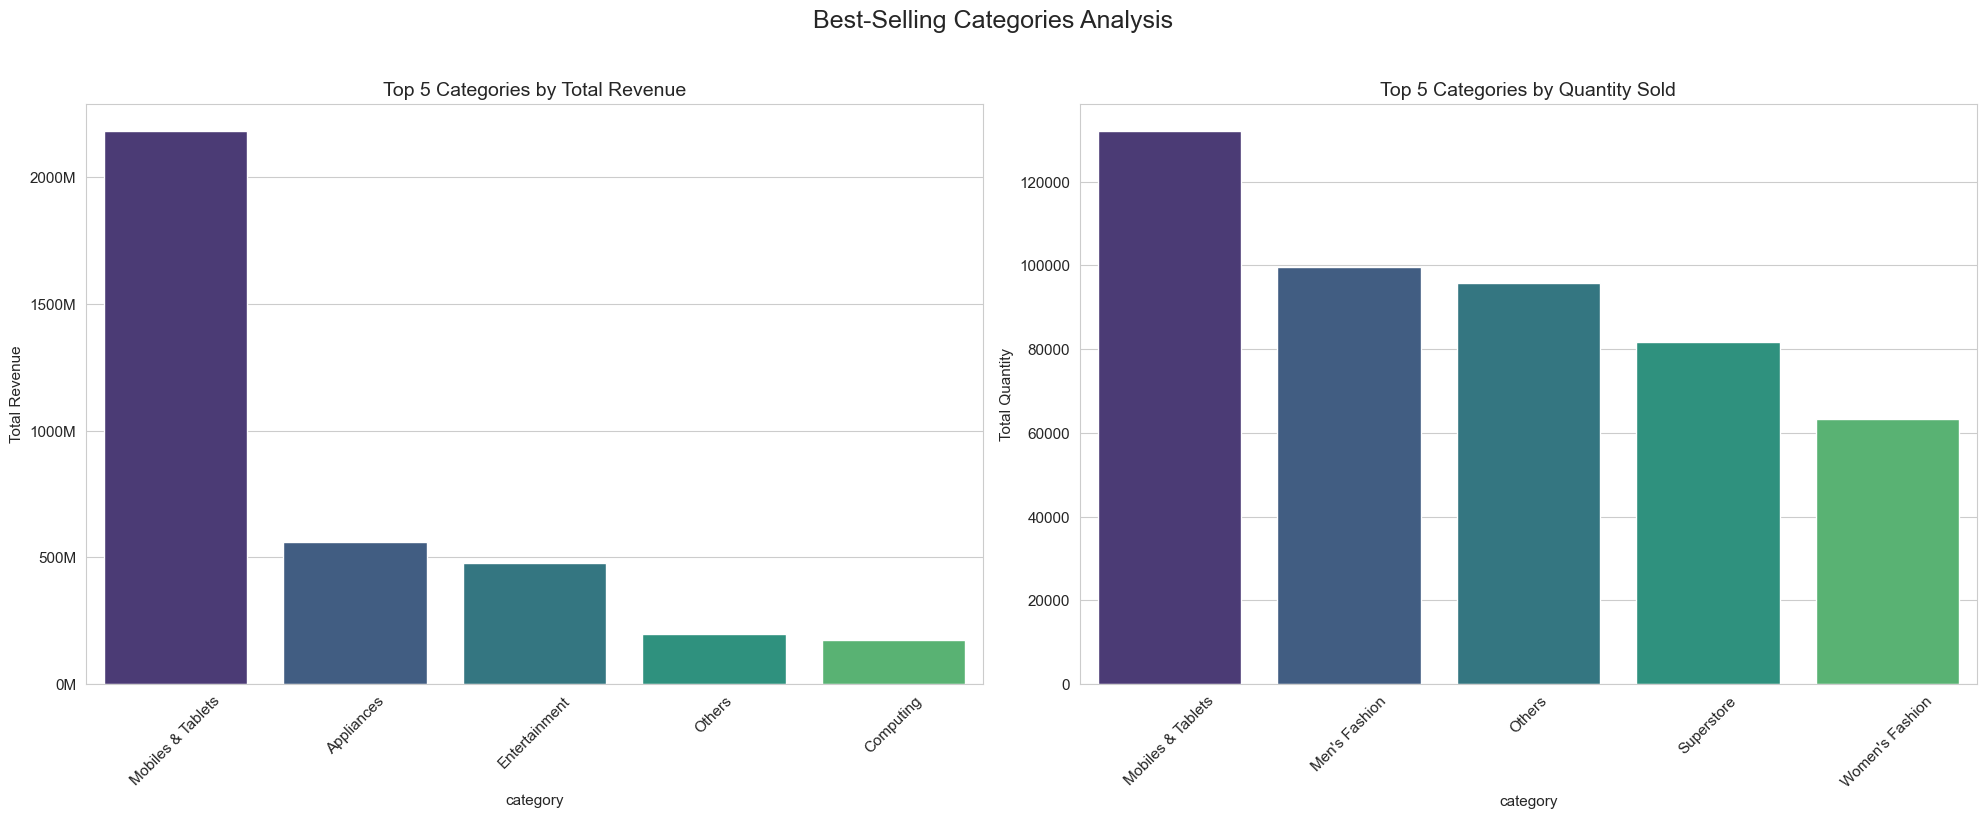

In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})
colors = sns.color_palette("viridis", 6)

# create just two axes in one row
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# 1. Top 5 Categories by Total Revenue
top_revenue = df.groupby('category')['grand_total'] \
                .sum().nlargest(5)
sns.barplot(
    x=top_revenue.index, 
    y=top_revenue.values, 
    palette=colors, 
    ax=axs[0]
)
axs[0].set_title('Top 5 Categories by Total Revenue', fontsize=14)
axs[0].set_ylabel('Total Revenue')
axs[0].tick_params(axis='x', rotation=45)
axs[0].yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: f'{int(x/1e6)}M')
)

# 2. Top 5 Categories by Quantity Sold
top_quantity = df.groupby('category')['qty_ordered'] \
                 .sum().nlargest(5)
sns.barplot(
    x=top_quantity.index, 
    y=top_quantity.values, 
    palette=colors, 
    ax=axs[1]
)
axs[1].set_title('Top 5 Categories by Quantity Sold', fontsize=14)
axs[1].set_ylabel('Total Quantity')
axs[1].tick_params(axis='x', rotation=45)

# finalize
plt.suptitle("Best-Selling Categories Analysis", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


## Which product categories perform best, and how do their transaction profiles differ? ##

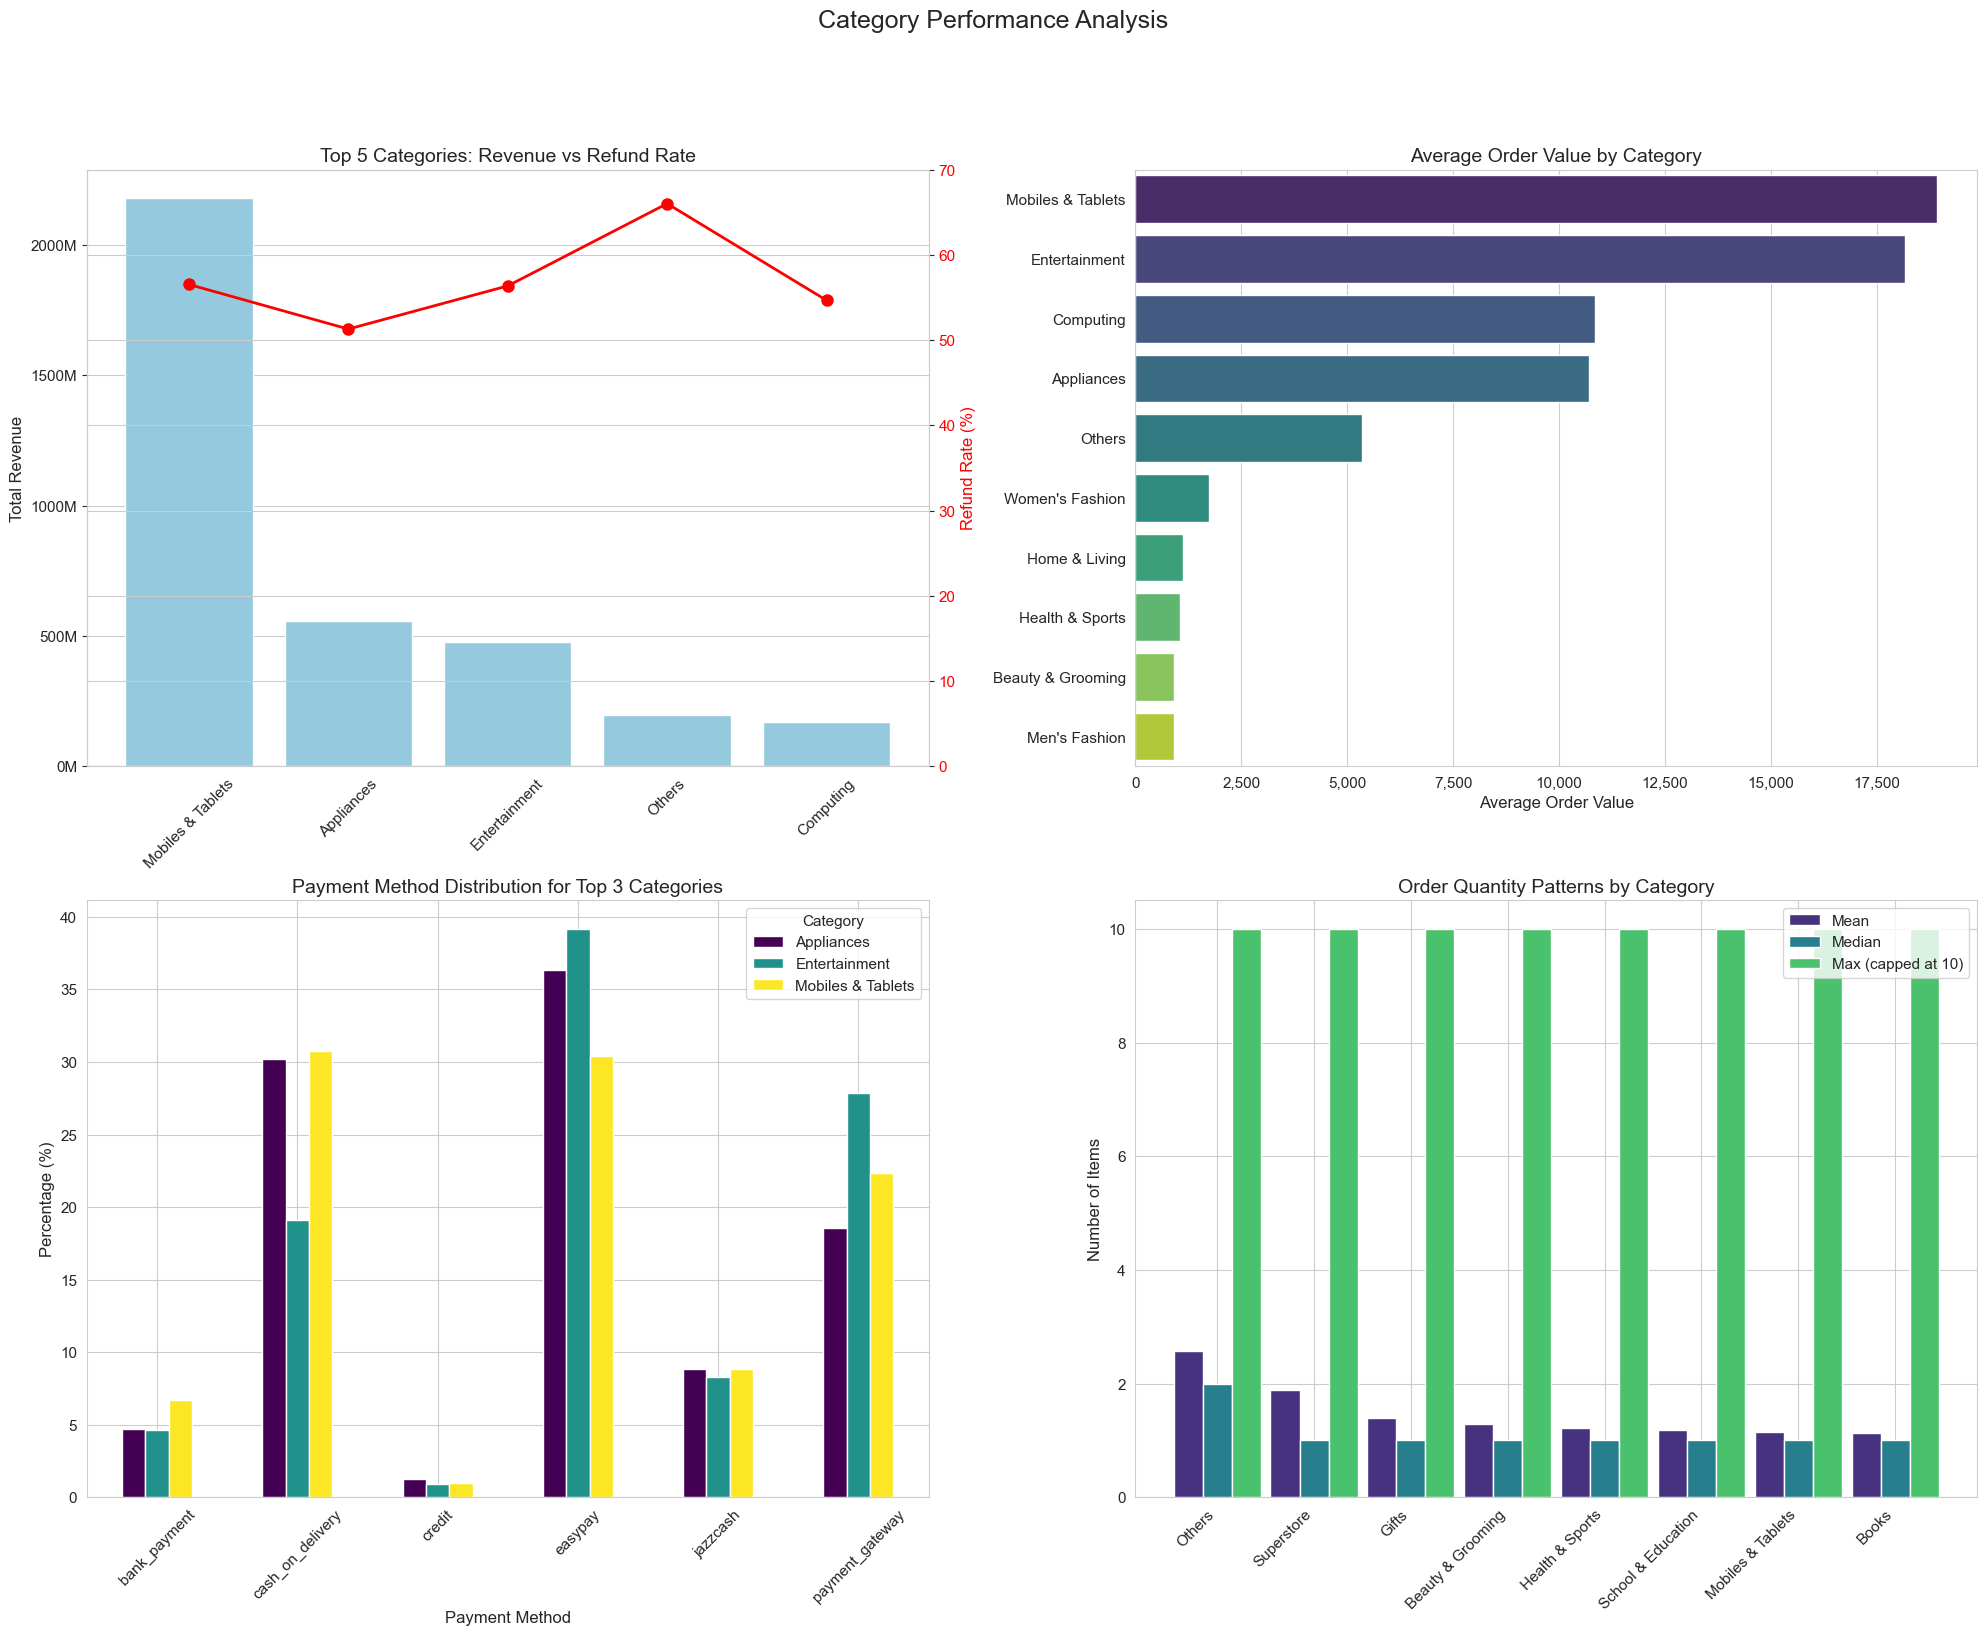

In [89]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})
colors = sns.color_palette("viridis", 6)

# Create a figure with multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top categories by Revenue and Refund Rate (top left)
top_cats = df.groupby('category')['grand_total'].sum().nlargest(5).reset_index()
refund_data = df.groupby('category')['status'].apply(lambda x: (x == 'canceled').mean() * 100).reset_index()
refund_data.columns = ['category', 'refund_rate']

# Merge data
merged = pd.merge(top_cats, refund_data, on='category')
merged = merged.sort_values('grand_total', ascending=False)

# Create bar plot with two y-axes
ax1 = axes[0, 0]
bars = sns.barplot(x='category', y='grand_total', data=merged, color='skyblue', ax=ax1)
ax1.set_ylabel('Total Revenue', fontsize=12)
ax1.set_xlabel('')
ax1.set_title('Top 5 Categories: Revenue vs Refund Rate', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1e6)}M'))

# Add refund rate line on secondary axis
ax2 = ax1.twinx()
ax2.plot(range(len(merged)), merged['refund_rate'], 'ro-', linewidth=2, markersize=8)
ax2.set_ylabel('Refund Rate (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 70)

# 2. Average Order Value by Category (top right)
avg_order = df.groupby('category')['grand_total'].mean().sort_values(ascending=False).head(10).reset_index()
ax = axes[0, 1]
sns.barplot(x='grand_total', y='category', data=avg_order, palette='viridis', ax=ax)
ax.set_title('Average Order Value by Category', fontsize=14)
ax.set_xlabel('Average Order Value', fontsize=12)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 3. Payment Method Distribution for Top Categories (bottom left)
top3_cats = top_cats['category'].head(3).tolist()
payment_dist = df[df['category'].isin(top3_cats)].groupby(['category', 'payment_method']).size().reset_index(name='count')
pivot_data = payment_dist.pivot_table(index='payment_method', columns='category', values='count', fill_value=0)
pivot_data = pivot_data.div(pivot_data.sum()).multiply(100)

ax = axes[1, 0]
pivot_data.plot(kind='bar', stacked=False, ax=ax, colormap='viridis')
ax.set_title('Payment Method Distribution for Top 3 Categories', fontsize=14)
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Category')
ax.tick_params(axis='x', rotation=45)

# 4. Order Quantity Analysis (bottom right)
qty_by_cat = df.groupby('category')['qty_ordered'].agg(['mean', 'median', 'max']).reset_index()
qty_by_cat = qty_by_cat.sort_values('mean', ascending=False).head(8)

ax = axes[1, 1]
bar_width = 0.3
x = np.arange(len(qty_by_cat))

ax.bar(x - bar_width, qty_by_cat['mean'], width=bar_width, label='Mean', color=colors[0])
ax.bar(x, qty_by_cat['median'], width=bar_width, label='Median', color=colors[2])
ax.bar(x + bar_width, np.minimum(qty_by_cat['max'], 10), width=bar_width, label='Max (capped at 10)', color=colors[4])

ax.set_xticks(x)
ax.set_xticklabels(qty_by_cat['category'], rotation=45, ha='right')
ax.set_title('Order Quantity Patterns by Category', fontsize=14)
ax.set_ylabel('Number of Items', fontsize=12)
ax.set_xlabel('')
ax.legend()

plt.tight_layout()
plt.suptitle("Category Performance Analysis", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.92)

In [76]:
# Save the preprocessed dataset in the current directory
preprocessed_path = './preprocessed_dataset.csv'
df.to_csv(preprocessed_path, index=False)
print(f'Preprocessed dataset saved to {preprocessed_path}')

Preprocessed dataset saved to ./preprocessed_dataset.csv
